In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Get the data

In [24]:
df = pd.read_csv('housing.csv')

In [25]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data preparation

In [26]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [27]:
columns = list(df.dtypes.index)

for col in columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique())

longitude
844
[-122.23 -122.22 -122.24 -122.25 -122.26 -122.27 -122.28 -122.29 -122.3
 -122.21 -122.2  -122.19 -122.18 -122.13 -122.16 -122.17 -122.15 -122.14
 -122.12 -122.33 -122.34 -122.06 -122.07 -122.08 -122.09 -122.1  -122.11
 -122.03 -121.97 -122.02 -122.04 -122.05 -121.99 -122.01 -121.96 -121.98
 -122.   -121.93 -121.94 -121.95 -121.92 -121.89 -121.91 -121.9  -121.88
 -121.87 -121.85 -121.86 -121.84 -121.82 -121.77 -121.62 -121.61 -121.72
 -121.73 -121.75 -121.8  -121.76 -121.78 -121.79 -119.78 -119.93 -120.
 -120.56 -120.59 -120.55 -120.25 -120.79 -120.8  -120.65 -120.76 -120.88
 -120.69 -120.93 -120.97 -120.87 -120.98 -120.72 -120.77 -120.66 -120.62
 -120.71 -121.83 -121.81 -121.74 -121.68 -121.54 -121.51 -121.59 -121.58
 -121.6  -121.63 -121.57 -121.65 -121.64 -121.71 -121.66 -121.56 -121.5
 -121.41 -121.39 -121.24 -121.19 -121.36 -121.46 -121.49 -121.44 -121.47
 -121.53 -121.52 -121.55 -121.67 -121.69 -121.7  -120.46 -120.54 -120.67
 -120.9  -120.91 -120.57 -120.43 -120.42 

- Fill missing values with 0

In [28]:
df.isnull().sum()[df.isnull().sum() > 0]

total_bedrooms    207
dtype: int64

In [29]:
df = df.fillna(0)

In [30]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

- Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.

In [31]:
df['rooms_per_household'] = df['total_rooms'] / df['households']

- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.

In [32]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

- Create a new column population_per_household by dividing the column population by the column households from dataframe.

In [19]:
df['population_per_household'] = df['population'] / df['households']

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


## Questions

### Question 1: What is the most frequent observation (mode) for the column ocean_proximity?

In [38]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Question 2: What are the two features that have the biggest correlation in this dataset?
- Create the correlation matrix for the numerical features of your train dataset.
- In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset. What are the two features that have the biggest correlation in this dataset?

In [43]:
numerical = list(df.dtypes[df.dtypes == 'float64'].index)
numerical

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'rooms_per_household',
 'bedrooms_per_room']

In [45]:
df[numerical].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465


In [46]:
import seaborn as sns

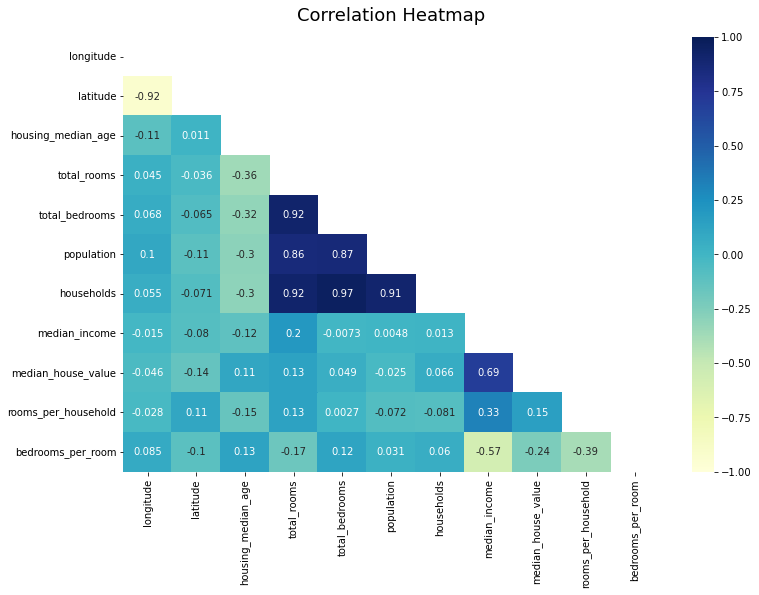

In [52]:
plt.figure(figsize = (12,8))

mask = np.triu(np.ones_like(df[numerical].corr(), dtype = np.bool))

corr_matrix = sns.heatmap(df[numerical].corr(), cmap = "YlGnBu", mask = mask, annot = True, vmin = -1, vmax = 1)

corr_matrix.set_title('Correlation Heatmap', fontdict = {'fontsize':18}, pad = 16);

---

**Make median_house_value binary**

- We need to turn the median_house_value variable from numeric into binary.
- Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

---

In [56]:
df['above_average'] = np.where(df['median_house_value'] > df['median_house_value'].mean(), 1, 0)

In [58]:
df['median_house_value'].mean()

206855.81690891474

In [57]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,1


---

**Split the data**
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

---

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [61]:
0.2/0.8

0.25

In [62]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [63]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [64]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_full_train = df_full_train.reset_index(drop = True)

In [65]:
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

In [79]:
y_train_binary = df_train['above_average'].values
y_val_binary = df_val['above_average'].values
y_test_binary = df_test['above_average'].values

In [66]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [81]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

### Question 3: What is the value of mutual information?

- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)

In [67]:
from sklearn.metrics import mutual_info_score

In [80]:
round(mutual_info_score(df_train.above_average, df_train.ocean_proximity), 2)

0.1

### Question 4: Accuracy

Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [82]:
dicts_train = df_train.to_dict(orient = 'records')

In [83]:
from sklearn.feature_extraction import DictVectorizer

In [84]:
dv = DictVectorizer(sparse = False)

In [85]:
X_train = dv.fit_transform(dicts_train)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model = LogisticRegression(solver = "liblinear", C = 1.0, max_iter = 1000, random_state = 42)

In [88]:
model.fit(X_train, y_train_binary)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [90]:
val_dicts = df_val.to_dict(orient = 'records')

In [91]:
X_val = dv.transform(val_dicts)

In [92]:
y_pred = model.predict_proba(X_val)[:, 1]

In [96]:
churn_decision_val = y_pred >= 0.5

In [101]:
round((y_val_binary == churn_decision_val.astype(int)).mean(),2)

0.84

### Question 5:
Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
    - total_rooms
    - total_bedrooms
    - population
    - households

note: the difference doesn't have to be positive

### Question 6: Best RMSE
- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
    - If there are multiple options, select the smallest alpha.

In [104]:
y_full_train = df_full_train['median_house_value']

In [106]:
y_full_train_binary = df_full_train['above_average']

In [107]:
del df_full_train['above_average']
del df_full_train['median_house_value']

In [113]:
y_full_train = np.log1p(y_full_train)

y_train = np.log1p(y_train)

y_val = np.log1p(y_val)

y_test = np.log1p(y_test)

In [115]:
from sklearn.linear_model import Ridge

In [140]:
numerical_ridge = list(df_full_train.dtypes[df_full_train.dtypes == 'float64'].index)
numerical_ridge

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room']

In [146]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha = a, solver = "sag", random_state = 42)
    model.fit(df_full_train[numerical_ridge], y_full_train)
    y_pred = model.predict(df_test[numerical_ridge])
    rmse = model.score(y_test, y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[10.77270764 10.7320612  13.12236738 ... 13.12236738 11.18859324
 11.9283475 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.